Hint - (A) What region do you think has the most sales? (((Done)))
- (A) What year has the most released games? (Year, Frequency) (((Done)))
- (A) Which publisher has prodcued the highest number of sold games? (Publisher, Game) (((Done)))



In [119]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
vgs_raw = pd.read_csv('vgsales.csv')
vgs_raw

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
vgs_raw.shape

(16598, 11)

In [8]:
vgs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
## printing the total number of null values
vgs_raw.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
vgs_raw.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
vgs_clean = vgs_raw.copy()

In [7]:
vgs_clean = vgs_clean.set_index('Rank')
vgs_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [8]:
vgs_clean.shape

(16598, 10)

In [9]:
vgs_clean.dropna(inplace = True)

In [10]:
vgs_clean.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
vgs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
vgs_clean["Year"] = vgs_clean["Year"].astype(int)

In [13]:
vgs_clean.to_csv('vgs_cleaned.csv')

In [15]:
vgs_clean["Year"].sort_values()

Rank
259      1980
6319     1980
1971     1980
5368     1980
1768     1980
         ... 
5290     2016
14393    2017
16441    2017
16244    2017
5959     2020
Name: Year, Length: 16291, dtype: int64

In [19]:
vgs_clean.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


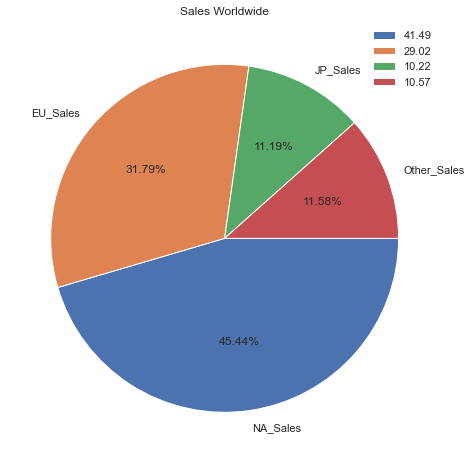

In [166]:
#(A) What region of the world do you think has the most sales? 41.49 NA_Sales in Wii Sports game
plt.style.use('seaborn-darkgrid')
x = vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max()
labels = vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max().index
labels1= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize = [10, 8])
plt.pie(x, labels = labels, counterclock= False, autopct= lambda p:f'{p:.2f}%')
plt.title('Sales Worldwide')
plt.legend(vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max())
plt.show()


In [54]:
x = vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max()
print(x)

NA_Sales       41.49
EU_Sales       29.02
JP_Sales       10.22
Other_Sales    10.57
dtype: float64


In [100]:
vgs_clean[vgs_clean.Year.duplicated(keep=False)].sort_values("Year")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
15039,Tokyo Xanadu eX+,PS4,2016,Role-Playing,Nihon Falcom Corporation,0.00,0.00,0.02,0.00,0.02
16227,New Interpretation Stranger of Sword City,PSV,2016,Role-Playing,Experience Inc.,0.00,0.00,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [83]:
vgs_clean.Year.value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

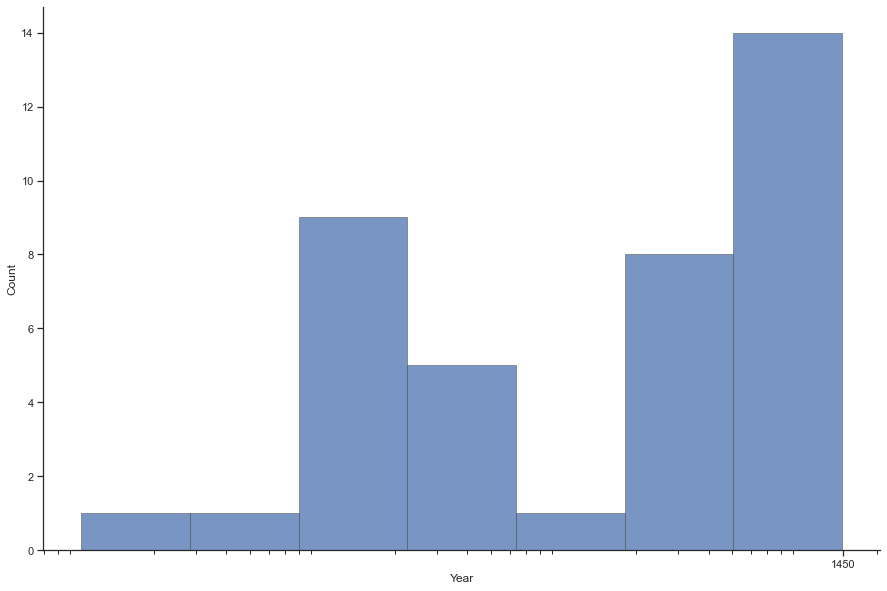

In [114]:
sns.set_theme(style="ticks")
xn = vgs_clean.Year.value_counts()
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(
    vgs_clean,
    x=xn,
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1450]);

<BarContainer object of 39 artists>

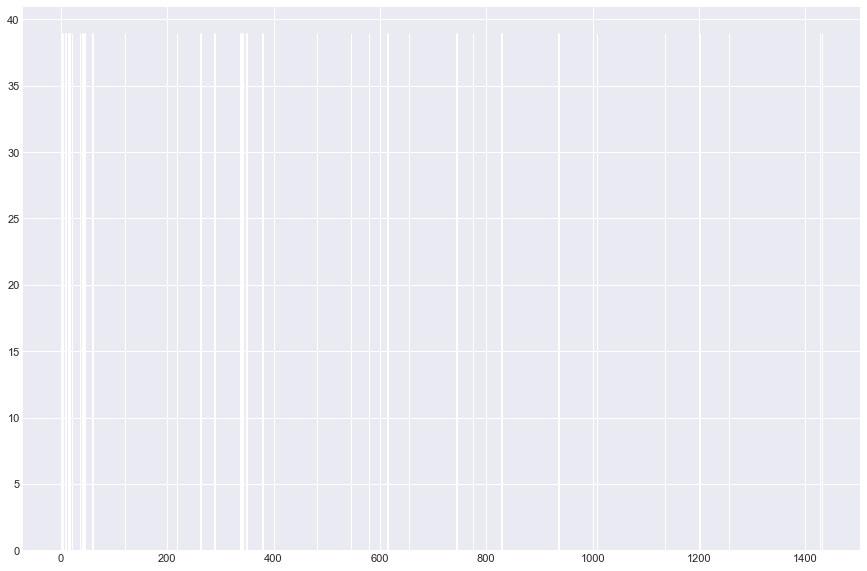

In [178]:
## 2- What year has the most released games? (((Done)))
xs = vgs_clean.Year.value_counts()
ys = len(xs)

plt.figure(figsize=(15, 10))
plt.bar(xs, ys)
#plt.xticks((0,2100))
#plt.yticks(0,2100)

- 3. What year has the most released games? 2009

In [58]:
#vgs_clean.duplicated(subset='Year', keep='first')

## 2- What year has the most released games? (((Done)))
dupyear = pd.DataFrame(vgs_clean, columns=['Year'])


In [59]:
duplicateYearR = dupyear[dupyear.duplicated()].value_counts()+1
print(duplicateYearR)

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
dtype: int64


<AxesSubplot:>

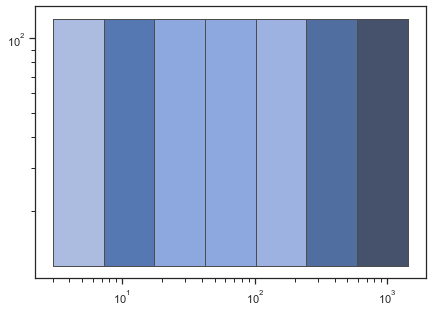

In [79]:
sns.set_theme(style="ticks")
n = duplicateYearR = dupyear[dupyear.duplicated()].value_counts()+1
plt.subplots(figsize=(7, 5))
sns.histplot(
    vgs_clean,
    x=n, y=len(n),
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.8,
    log_scale=True,
)
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_yticks([1,2000])

#ax.set_xticks([1, 3000]);

- 4. Which publisher has prodcued the highest number of games? EA = 1339

In [81]:
vgs_clean.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [170]:
duppublisher = pd.DataFrame(vgs_clean, columns=['Publisher'])
duplicatePubR = duppublisher[duppublisher.duplicated()].value_counts()+1
print(duplicatePubR)

Publisher                   
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Groove Games                       2
HMH Interactive                    2
Hamster Corporation                2
Harmonix Music Systems             2
responDESIGN                       2
Length: 384, dtype: int64


In [172]:
vgs_clean.groupby(['Publisher', 'Name'])['Year'].mean()

Publisher             Name                                  
10TACLE Studios       Boulder Dash: Rocks!                      2007.0
                      Panzer Tactics                            2007.0
                      Pirates: Legend of the Black Buccaneer    2006.0
1C Company            King's Bounty: Armored Princess           2009.0
                      Men of War: Assault Squad                 2011.0
                                                                 ...  
imageepoch Inc.       SoniPro                                   2014.0
                      Toushin Toshi                             2014.0
inXile Entertainment  Wasteland 2                               2015.0
mixi, Inc             Monster Strike 3DS                        2015.0
responDESIGN          Yourself Fitness                          2004.5
Name: Year, Length: 11696, dtype: float64

In [122]:
vgs_clean[ vgs_clean.Year.isin([ 2017, 2018, 2019, 2020])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [158]:
vgs_clean[ vgs_clean.Publisher.isin(['Electronic Arts'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
83,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
100,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...
16342,Command & Conquer Renegade,PC,2002,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16387,Poker for Dummies,PC,2008,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16416,The Godfather (JP sales),X360,2006,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
